In [656]:
import numpy as np

In [657]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Gradient Descent
            d_weights = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            d_bias = (1 / n_samples) *  np.sum(y_predicted - y)

            # Updatings Parameters
            self.weights = self.weights - (self.lr * d_weights)
            self.bias = self.bias - (self.lr * d_bias)


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias # y = A + B * X || y = (X * B) + A
        return y_predicted

In [658]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

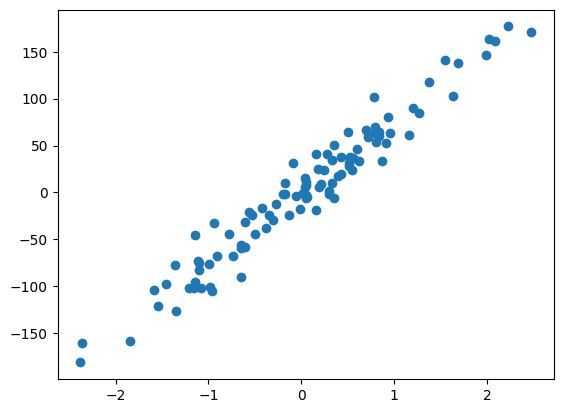

In [659]:
X_db, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X_db, y, test_size=0.2)

fig = plt.figure()
plt.scatter(X_db[:, 0], y)
plt.show()

In [660]:
reg = LinearRegression(learning_rate=0.01)
reg.fit(X_train, y_train)
y_predictions = reg.predict(X_test)

In [661]:
y_predictions

array([  90.07616325,   65.22041584,  -45.69264845,  -82.48790623,
         20.93884211,  -73.92169888,  -14.9088548 ,  151.65264231,
         14.01725303, -102.2910724 ,   15.56846563,   41.60341884,
         26.20273534,   38.12032261,   37.38270397,  -37.35622388,
        -83.12304575,   26.30377956,   38.1309002 ,   29.45253316])

In [662]:
def mean_square_error(y_test, y_predicted):
    mse = np.mean(np.power(y_test - y_predicted, 2))
    return mse

In [663]:
mean_square_error(y_test, y_predictions)

305.7719958301902

In [664]:
y_pred_line = reg.predict(X_db)

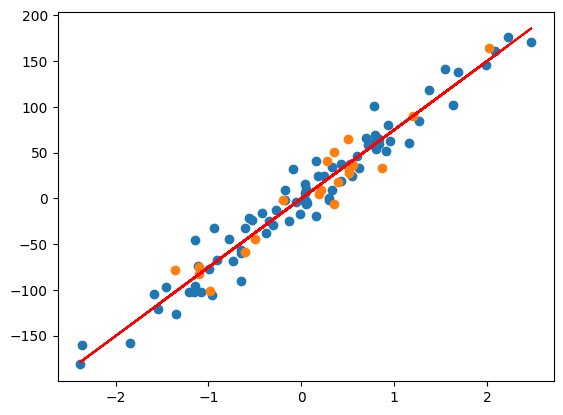

In [665]:
scatter_train = plt.scatter(X_train, y_train)
scatter_test = plt.scatter(X_test, y_test)
plt.plot(X_db, y_pred_line, color='red', label='prediction')
plt.show()

In [666]:
# The end 